<a href="https://colab.research.google.com/github/gnrtd/ML_Practice/blob/main/12oct2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Naive Model, SMA, EMA, TRIX**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [6]:
df = pd.read_csv('apple.csv')

In [7]:
df

,Date,Open,High,Low,Close,Volume
0,04/05/2015 16:00:00,32.38,32.64,32.07,32.17,50988278
1,05/05/2015 16:00:00,32.04,32.11,31.45,31.45,49271416
2,06/05/2015 16:00:00,31.64,31.69,30.84,31.25,72141010
3,07/05/2015 16:00:00,31.19,31.52,31.01,31.32,43940895
4,08/05/2015 16:00:00,31.67,31.91,31.53,31.91,55550382
...,...,...,...,...,...,...
2511,28/04/2025 16:00:00,210.00,211.50,207.46,210.14,38743074
2512,29/04/2025 16:00:00,208.69,212.24,208.37,211.21,36827633
2513,30/04/2025 16:00:00,209.30,213.58,206.67,212.50,52286454
2514,01/05/2025 16:00:00,209.08,214.56,208.90,213.32,57365675


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S')
df = df.sort_values(by='Date')

In [9]:
df = df.set_index('Date')

In [10]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-05-04 16:00:00,32.38,32.64,32.07,32.17,50988278
2015-05-05 16:00:00,32.04,32.11,31.45,31.45,49271416
2015-05-06 16:00:00,31.64,31.69,30.84,31.25,72141010
2015-05-07 16:00:00,31.19,31.52,31.01,31.32,43940895
2015-05-08 16:00:00,31.67,31.91,31.53,31.91,55550382
...,...,...,...,...,...
2025-04-28 16:00:00,210.00,211.50,207.46,210.14,38743074
2025-04-29 16:00:00,208.69,212.24,208.37,211.21,36827633
2025-04-30 16:00:00,209.30,213.58,206.67,212.50,52286454


In [18]:
ts_data = df['Close']

In [19]:
ts_data

,Close
Date,
2015-05-04 16:00:00,32.17
2015-05-05 16:00:00,31.45
2015-05-06 16:00:00,31.25
2015-05-07 16:00:00,31.32
2015-05-08 16:00:00,31.91
...,...
2025-04-28 16:00:00,210.14
2025-04-29 16:00:00,211.21
2025-04-30 16:00:00,212.50


In [21]:
len(ts_data)

2516

#Naive Model

In [22]:
# Naive Model -> Prev Day Price

In [23]:
naive_historical_fit = ts_data.shift(1)

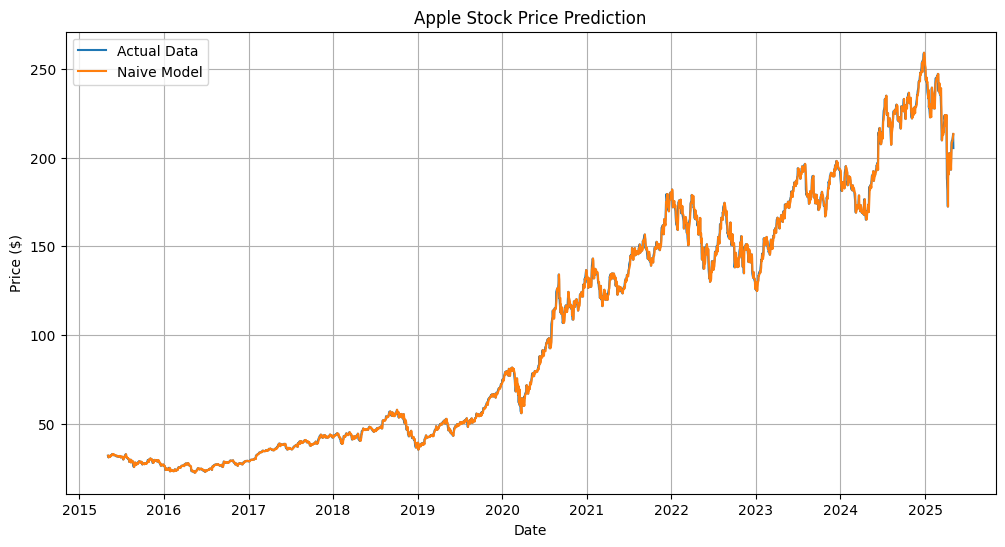

In [24]:
plt.figure(figsize=(12,6))
plt.plot(ts_data.index, ts_data, label='Actual Data')
plt.plot(ts_data.index, naive_historical_fit, label='Naive Model')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid('True')

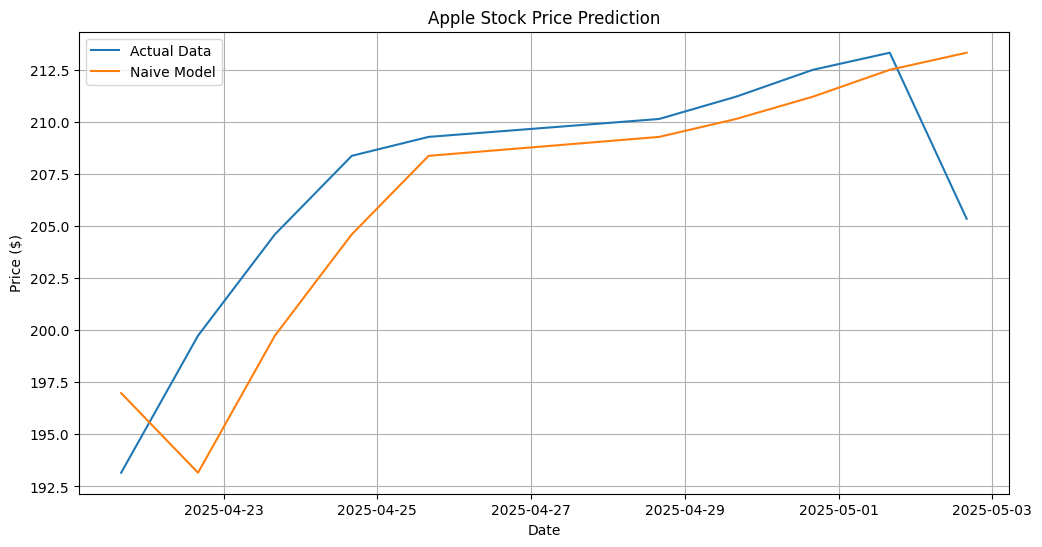

In [26]:
# let's look just 10 days
plt.figure(figsize=(12,6))
plt.plot(ts_data.index[-10:], ts_data[-10:], label='Actual Data')
plt.plot(ts_data.index[-10:], naive_historical_fit[-10:], label='Naive Model')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid('True')

#Simple Moving Average

In [27]:
window_size = 5

sma_historical_fit = ts_data.rolling(window=5).mean().shift(1)

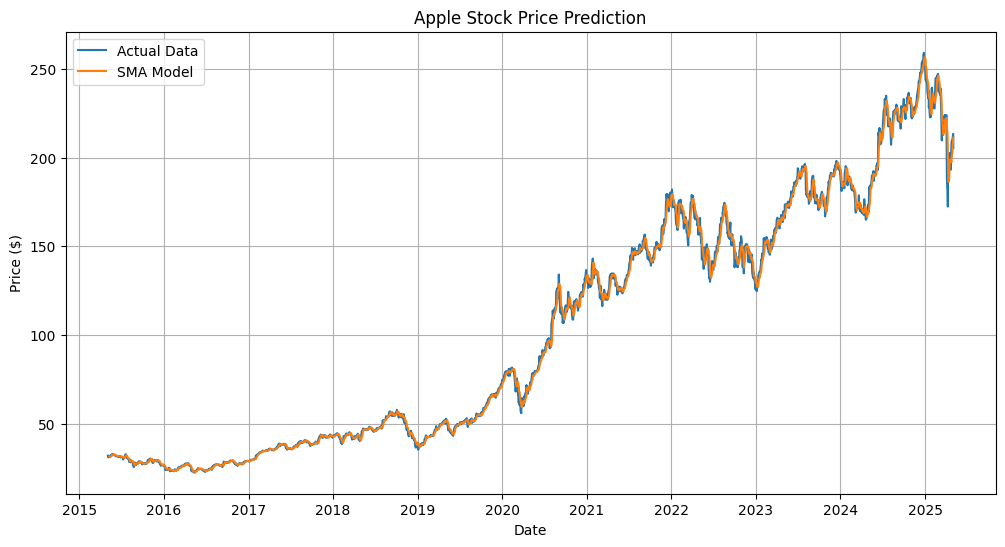

In [28]:
plt.figure(figsize=(12,6))
plt.plot(ts_data.index, ts_data, label='Actual Data')
plt.plot(ts_data.index, sma_historical_fit, label='SMA Model')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid('True')

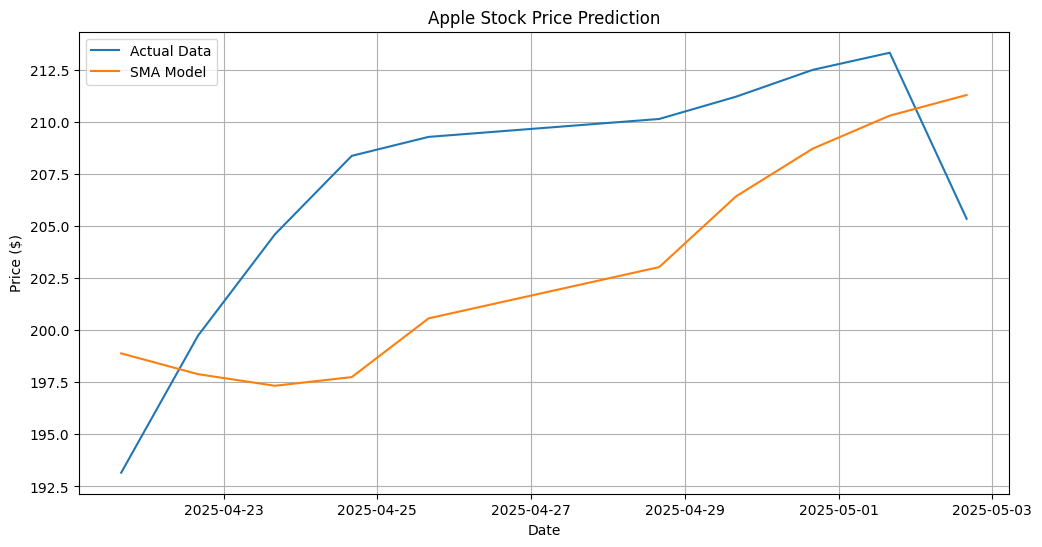

In [29]:
plt.figure(figsize=(12,6))
plt.plot(ts_data.index[-10:], ts_data[-10:], label='Actual Data')
plt.plot(ts_data.index[-10:], sma_historical_fit[-10:], label='SMA Model')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid('True')

#Exponential Moving Average Model

In [30]:
ema_model = SimpleExpSmoothing(ts_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
ema_fit = ema_model.fit()

In [32]:
ema_historical_fit = ema_fit.fittedvalues

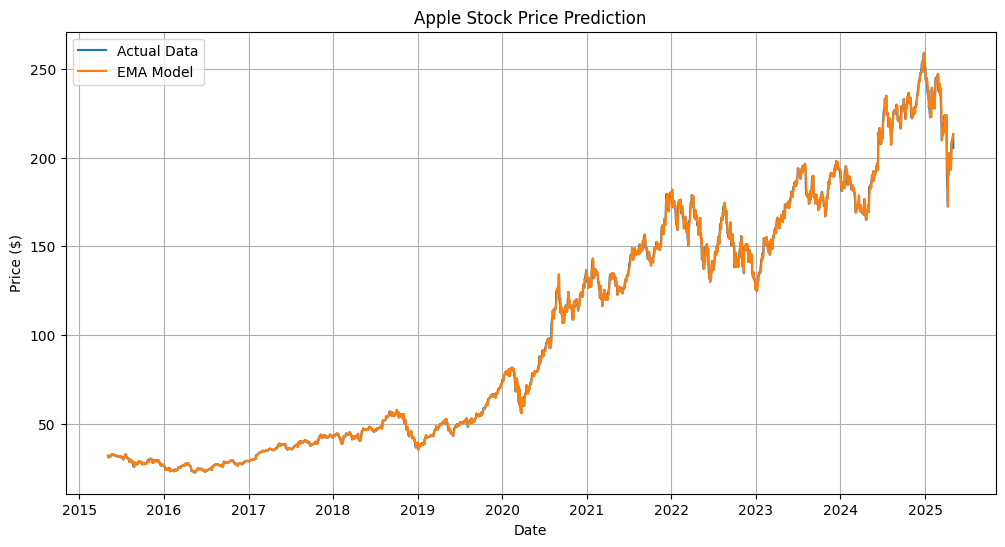

In [34]:
plt.figure(figsize=(12,6))
plt.plot(ts_data.index, ts_data, label='Actual Data')
plt.plot(ts_data.index, ema_historical_fit, label='EMA Model')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid('True')

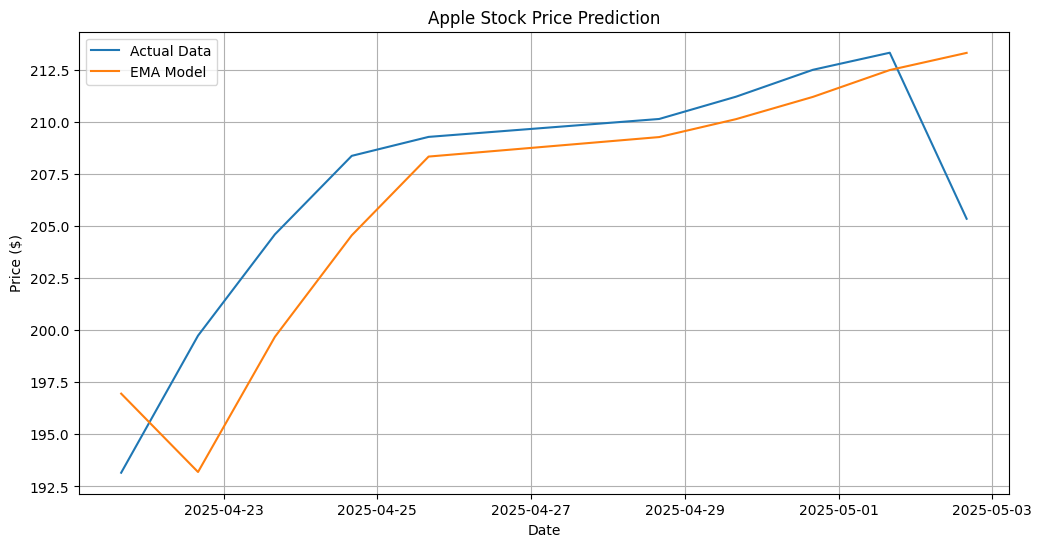

In [61]:
plt.figure(figsize=(12,6))
plt.plot(ts_data.index[-10:], ts_data[-10:], label='Actual Data')
plt.plot(ts_data.index[-10:], ema_historical_fit[-10:], label='EMA Model')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid('True')